## Image Smoothing

### By using masks

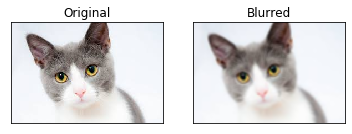

In [128]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg')
#Open Cv used BGR color space
img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Edge Detection

### Using masks
[Why u should blur image before using edge detection](https://blog.drecks-provider.de/why-you-should-blur-an-image-before-processing-it-using-opencv-and-python/)

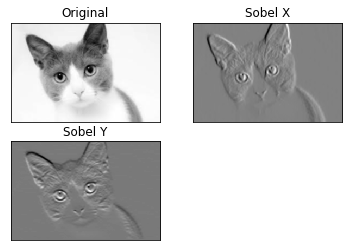

In [116]:
# converting to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(221)
plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.show()
plt.subplot(222)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
# plt.show()
plt.subplot(223)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

## Template Matching

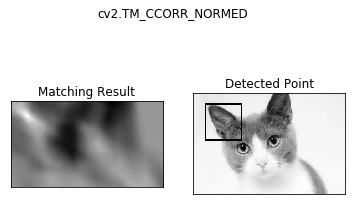

In [117]:
img = cv2.imread('cat.jpg',0)
img2 = img.copy()
template = cv2.imread('ear.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
meth = 'cv2.TM_CCORR_NORMED'

img = img2.copy()
method = eval(meth)
# Apply template Matching
res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
color=(0,0,0)
cv2.rectangle(img,top_left, bottom_right, color, 2)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)
plt.show()

## Using skin color for face detection

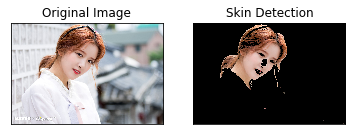

In [132]:
img=cv2.imread('exy.jpeg')
img_orig=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
imageHSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
LB=np.array([0,40,80],dtype="uint8")
UB = np.array([20,255,255],dtype="uint8")
skinMask = cv2.inRange(imageHSV,LB,UB)
skinHSV = cv2.bitwise_and(img_orig, img_orig, mask=skinMask)

plt.subplot(121), plt.imshow(img_orig)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(skinHSV)
plt.title('Skin Detection'), plt.xticks([]), plt.yticks([])
plt.show()

## Background differencing and location of object

### Background differencing

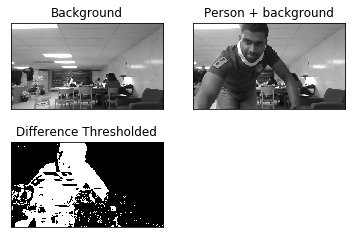

In [119]:
# only background
img1=cv2.imread('background.jpg',0)
# with person
img2=cv2.imread('person.jpg',0)

img_blob=img2-img1
T,M =100,255
method=cv2.THRESH_BINARY
_,thresholded=cv2.threshold(img_blob, T,M, method)

plt.subplot(221),plt.imshow(img1,cmap='gray')
plt.title('Background'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(img2,cmap='gray')
plt.title('Person + background'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(thresholded,cmap='gray')
plt.title('Difference Thresholded'), plt.xticks([]), plt.yticks([])
plt.show()

### locating me in the image

In [120]:
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
thresholded_copy=cv2.cvtColor(thresholded,cv2.COLOR_GRAY2RGB)
img2_copy=cv2.cvtColor(img2,cv2.COLOR_GRAY2RGB)

# Uncomment to get all contours on image
# op_fine=cv2.drawContours(thresholded_copy, contours, -1, (255,0,0), 15)

# drawing a box around the biggest blob
cont_sorted = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
x,y,w,h = cv2.boundingRect(cont_sorted[0])

op_bw=cv2.rectangle(thresholded_copy,(x,y),(x+w,y+h),(255,0,0),15)

op_orig=cv2.rectangle(img2_copy,(x,y),(x+w,y+h),(255,0,0),15)

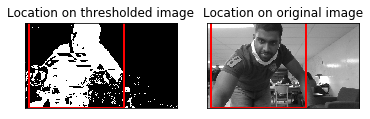

In [121]:
# Uncomment to show all contours on image
# plt.imshow(op_fine)
# plt.title('All contours on thresholded image'), plt.xticks([]), plt.yticks([])
# plt.show()

plt.subplot(121),plt.imshow(op_bw)
plt.title('Location on thresholded image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(op_orig)
plt.title('Location on original image'), plt.xticks([]), plt.yticks([])

plt.show()

### Notes -
Learnings -
* Traditional CV algorithms very sensitive to noise so always blur the image first -> important preprocessing

Object detection via projections
1. If we know the color of the object being detected only then can this method be used
    1. Even then the problem of overlapped histograms
    1. Say if two faces were present side by side with some offset the y projects would be much larger and the model would not be able to detect the face accurately
    1. Example - The blue bounding boxes are not accurate for the three faces
    ![lt](wjsn_bb.jpg)